# Ejercicio 9 - guía 1

Sean 𝑋1, . . . , 𝑋𝑛 vaiid distribuidas como una Bernoulli 𝑝 para cierto 𝑝 ∈ (0, 1) y 𝑛 ∈ N. Fijado 𝛼 > 0, definimos:

![Definicion estimador de p](../../imagenes/ejercicio_9_guia1_bernoulli.png)

## a) 
Sean 𝛼 = 0.05 y 𝑝 = 0.4. Simular en la computadora para ver con qué frecuencia el intervalo
𝐶𝑛 contiene a 𝑝. Hacer esto para varios valores de 𝑛 entre 1 y 10000. Graficar la cobertura,
es decir la proporción de veces que el intervalo contiene a 𝑝, versus 𝑛.

### Desarrollo

Como primer paso voy a desarrollar una función que dado un n genere n observaciones de la distribución bernoulli para el p indicado, calcule el estimador junto al intervalo de confianza y que finalmente devuelva una proporción que represente la cantidad de veces que el verdadero valor de p estuvo dentro del intervalo de confianza.

In [63]:
import numpy as np

def proporcion_p_intervalo_confianza(n, bernoulli_dist, alpha=0.05):
    
    # Inicializo el contador
    contador = 0
    for i in range(n):

        # Genero n muestras de la bernoulli dada
        muestras = bernoulli_dist.rvs(n)
        
        # Calculo el estimador para p 
        p_estimado = sum(muestras) / (n -1)
        
        # Calculo el epsilon del intervalo de confianza
        epsilon = np.sqrt(np.log(2/alpha) / (2 * n))
        
        # Calculo el intervalo de confianza
        intervalo = (p_estimado - epsilon, p_estimado + epsilon)
        
        # Si p = 0.4 esta en el intervalo de confianza incremento en 1 el contador
        if intervalo[0] <= 0.4 <= intervalo[1]:
            contador += 1
        
    return contador / n

Hago una prueba de la función con n igual a 1000:

In [64]:
from scipy.stats import bernoulli

# Inicializo una bernoulli con p = 0.4
bernoulli_04 = bernoulli(0.4)

proporcion_p_intervalo_confianza(1000, bernoulli_04)

0.992

Ahora preparo el gráfico de la cobertura, es decir n vs la proporción de aciertos:

In [74]:
# Genero una lista que contenga proporciones para experimentos entre 2 y 10000
proporciones = [proporcion_p_intervalo_confianza(n, bernoulli_04) for n in range(2, 2001)]

Text(0.5, 1.0, 'Proporción de p en el intervalo de confianza en función de n')

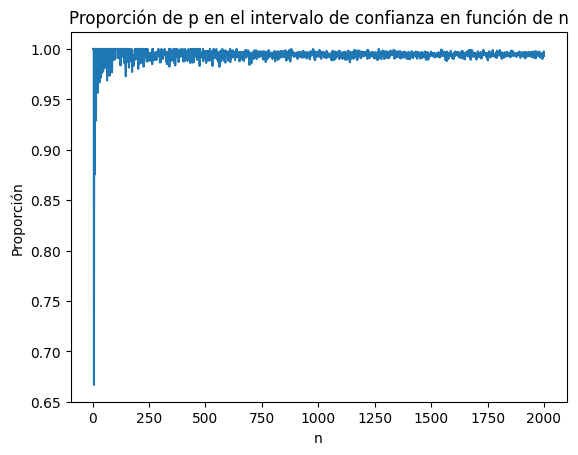

In [76]:
import matplotlib.pyplot as plt

# Genero el gráfico de la proporción en función de n
plt.plot(range(2, 2001), proporciones)
plt.xlabel('n')
plt.ylabel('Proporción')
plt.title('Proporción de p en el intervalo de confianza en función de n')

## b) 
Graficar la longitud del intervalo versus 𝑛. Supongamos que queremos que la longitud del
intervalo no sea más grande que 0.05. ¿Cuán grande debería ser 𝑛?

### Desarrollo

Ahora debo desarrollar una función similar a la anterior en donde el valor de retorno sea la longitud del intervalo de confianza.

In [77]:
def obtener_long_intervalo_confianza(n, bernoulli_dist, alpha=0.05):

    # Genero n muestras de la bernoulli dada
    muestras = bernoulli_dist.rvs(n)
        
    # Calculo el estimador para p 
    p_estimado = sum(muestras) / (n -1)
        
    # Calculo el epsilon del intervalo de confianza
    epsilon = np.sqrt(np.log(2/alpha) / (2 * n))
        
    # Calculo el intervalo de confianza
    intervalo = (p_estimado - epsilon, p_estimado + epsilon)
        
    return intervalo[1] - intervalo[0]

Ahora preparo el gráfico de la longitud del intervalo vs n:

Text(0, 0.5, 'Longitud IC')

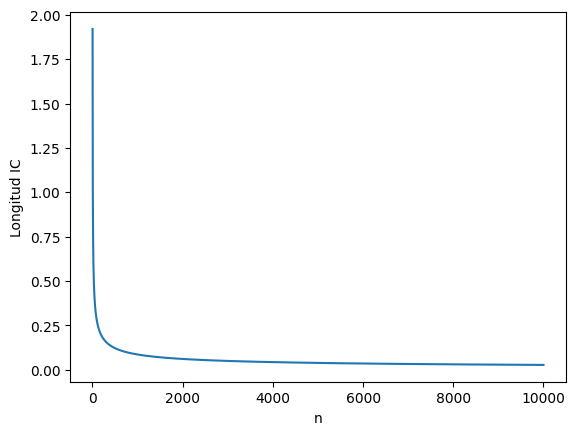

In [80]:
# Genero una lista que contenga longitudes de intervalo de confianza para experimentos entre 2 y 10000
longitudes = [obtener_long_intervalo_confianza(n, bernoulli_04) for n in range(2, 10001)]

# Genero el gráfico de la longitud en función de n
plt.plot(range(2, 10001), longitudes)
plt.xlabel('n')
plt.ylabel('Longitud IC')


Obtengo el n que me permita tener una longitud del intervalo no mayor a 0.05:

In [81]:
n = next(n for n, longitud in enumerate(longitudes, 2) if longitud < 0.05)

print(n)

2952


Verifico que el n obtenido sea correcto:

In [87]:
obtener_long_intervalo_confianza(2952, bernoulli_04)

np.float64(0.04999240764926627)

Podemos ver que es el n que justo está por debajo en longitud de 0.05, por lo tanto podemos afirmar que para valores de n mayores a 2952 obtendremos una longitud del intervalo de confianza no mayor a 0.05.